# Homework 5

## Image Processing and Pixel Classification


This week's homework is about classifying pixels in a sattelite image:

# 509191237- Mert CAN

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from scipy.io import loadmat
import pandas as pd

The image below a sattelite image of Salinas Valley, California of 512 pixels by 217 pixels where individual values tells us what is planted in that specific area: 

0         Brocoli_green_weeds_1 
1         Brocoli_green_weeds_2 
2                        Fallow 
3             Fallow_rough_plow 
4                 Fallow_smooth 
5                       Stubble 
6                        Celery 
7              Grapes_untrained 
8          Soil_vinyard_develop 
9     Corn_senesced_green_weeds 
10          Lettuce_romaine_4wk 
11          Lettuce_romaine_5wk 
12          Lettuce_romaine_6wk 
13          Lettuce_romaine_7wk 
14            Vinyard_untrained 
15     Vinyard_vertical_trellis 
Name: Class , dtype: object

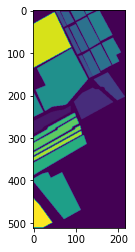

In [5]:
salinas_gt = loadmat('data/Salinas_gt.mat')['salinas_gt']
salinas = loadmat('data/Salinas.mat')['salinas']
salinas_classes = pd.read_csv('data/Salinas_classes.csv',sep='\t')['Class ']
plt.imshow(salinas_gt)
salinas_classes

The main data `salinas` is a tensor (i.e. a multi-dimensional array) of shape (512,217,224). This means we have 224 different greyscale images taken in different wavelengths. Below, I am going to reshape the data into a matrix of shape $(512\cdot 217,224)$ so that each row is a flattened matrix.

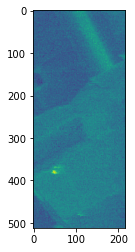

In [6]:
scaler = MinMaxScaler()
salinas_reshaped = scaler.fit_transform(salinas.reshape((512*217,224)))
salinas_gt_reshaped = salinas_gt.reshape(512*217)

plt.imshow(salinas_reshaped[:,0].reshape((512,217)))

## Question

Each pixel belongs to a specific class given by `salinas_classes`.  Form a 

1. Linear Discriminant Analysis model,
2. Support Vector Machines model,
3. Logistic Regression model,
4. Decision Tree model,
5. Boosted Tree model

to predict which pixel belongs to which class. Train and test your model and evaluate your accuracy together with a confidence interval.

1.) LDA model,

In [4]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import scipy.stats as st


In [15]:
X, y = salinas_reshaped, salinas_gt_reshaped

In [7]:
from sklearn.model_selection import train_test_split


In [49]:
from scipy.stats import t

def Experiment(X,y,model,ts=0.30):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=ts)
    model=LinearDiscriminantAnalysis()
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [50]:
import scipy.stats 
N = 5
experiments = np.array([Experiment(X,y,LinearDiscriminantAnalysis('Entropy')) for i in range(N)])
t.interval(0.95,N-1,loc=experiments.mean(),scale=experiments.var())


/Users/mertcan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass solver=Entropy as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/mertcan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass solver=Entropy as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/mertcan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass solver=Entropy as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/mertcan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass solver=Entropy as keyword args. From versi

(0.8122998495164929, 0.8123131350028882)

2.) SVM model,

In [15]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.8379335173406937

In [11]:
from scipy.stats import t

def Experiment(X,y,model,ts=0.30):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=ts)
    model=SVC()
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [12]:
import scipy.stats 
from sklearn.svm import SVC

N = 3
experiments = np.array([Experiment(X,y,SVC('Entropy')) for i in range(N)])
t.interval(0.95,N-1,loc=experiments.mean(),scale=experiments.var())


/Users/mertcan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass C=Entropy as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/mertcan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass C=Entropy as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/mertcan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass C=Entropy as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


(0.8370996467266741, 0.8371073215520569)

3.)Logistic Regression model,

In [16]:
from sklearn.linear_model import LogisticRegression
lrc=LogisticRegression(solver="newton-cg")
lrc.fit(X_train,y_train)
lrc.score(X_test,y_test)

0.7819512780511221

In [29]:
from scipy.stats import t
from sklearn.linear_model import LogisticRegression
def Experiment(X,y,model,ts=0.30):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=ts)
    model=LogisticRegression()
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [30]:
import scipy.stats 
N = 3
experiments = np.array([Experiment(X,y,LogisticRegression('Entropy')) for i in range(N)])
t.interval(0.95,N-1,loc=experiments.mean(),scale=experiments.var())

/Users/mertcan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mertcan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

(0.7076317834438969, 0.7078248348208339)

4.)Decision Tree model,

In [37]:
from scipy.stats import t
from sklearn.tree import DecisionTreeClassifier
X, y = salinas_reshaped, salinas_gt_reshaped
def Experiment(X,y,model,ts=0.30):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=ts)
    model1=DecisionTreeClassifier()
    model1.fit(X_train,y_train)
    return model1.score(X_test,y_test)

In [38]:
import scipy.stats 
from sklearn.tree import DecisionTreeClassifier

N = 3
experiments = np.array([Experiment(X,y,DecisionTreeClassifier(criterion='entropy')) for i in range(N)])
t.interval(0.95,N-1,loc=experiments.mean(),scale=experiments.var())

(0.8886546623862728, 0.8886564300574251)

5.) Boosted Tree model

In [8]:
import xgboost as xgb

In [12]:
X, y = salinas_reshaped, salinas_gt_reshaped
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

XGB=xgb.XGBClassifier(eval_metric= 'mlogloss')
XGB.fit(X_train,y_train)


/Users/mertcan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [66]:
XGB.score(X_test,y_test)

0.9410642281105991

In [11]:
from scipy.stats import t
X, y = salinas_reshaped, salinas_gt_reshaped

def Experiment(X,y,model,ts=0.25):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
    model=XGB=xgb.XGBClassifier(eval_metric= 'mlogloss')
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [12]:
N = 2
experiments = np.array([Experiment(X,y,
                                     xgb.XGBClassifier(objective='binary:logistic', 
                                                       eval_metric='error',
                                                       use_label_encoder=False))
                        for i in range(N)])
t.interval(0.95,N-1,loc=experiments.mean(),scale=experiments.var())

/Users/mertcan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


(0.9394777551418044, 0.9394824983144167)